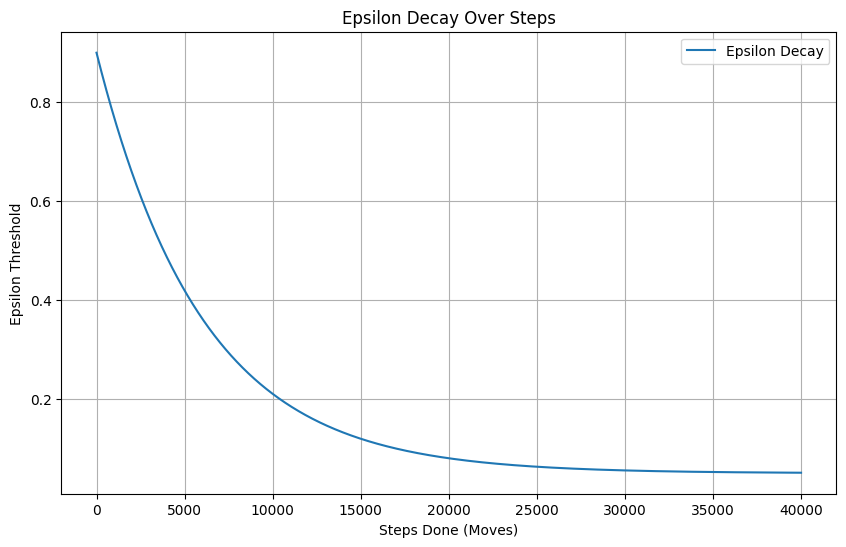

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants updated
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 6000

# Generate values for steps_done
steps_done = np.arange(0, 40000, 1)  # Extend range to see more of the decay process

# Calculate eps_threshold for each step
eps_threshold = EPS_END + (EPS_START - EPS_END) * np.exp(-1. * steps_done / EPS_DECAY)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(steps_done, eps_threshold, label='Epsilon Decay')
plt.title('Epsilon Decay Over Steps')
plt.xlabel('Steps Done (Moves)')
plt.ylabel('Epsilon Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
import import_ipynb
from environment import TicTacToe3D
import numpy as np

state = np.array([
  [
    [1, -1, 1, -1],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
  ],
  [
    [1, -1, 1, -1],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
  ],
  [
    [1, -1, 1, -1],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
  ],
  [
    [-1, 1, 1, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
  ]
])
env = TicTacToe3D(headless=False)
env.loadState(state)
while True:
  env.draw_lines()
  env.draw_figures()

KeyboardInterrupt: 

In [8]:
import pygame
pygame.quit()

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchsummary import summary

class DQN(nn.Module):

    def __init__(self):
        
        super(DQN, self).__init__()
        # first convolutional layer 4x4x4 => 4x4x8
        self.conv1 = nn.Conv2d(4, 8, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(8)
        
        # second convolutional layer 4x4x8 => 4x4x16
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        
        # third convolutional layer 4x4x16 => 4x4x32
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        
        # first fully connected layer 512 => 512
        self.fc1 = nn.Linear(4*4*32, 4*4*32)
        
        # second fully connected layer 512 => 256
        self.fc2 = nn.Linear(32*4*4, 16*4*4)

        # third fully connected layer 256 => 128
        self.fc3 = nn.Linear(16*4*4, 8*4*4)

        # output layer 256 => 128
        self.output = nn.Linear(8*4*4, 1*4*4)

    def forward(self, x):
        print(x.shape)
        x = x.view(-1, 4, 4, 4)
        
        # conv1 + bn1 with activation function ReLU
        x = nn.functional.relu(self.bn1(self.conv1(x)))
        
        # conv2 + bn2 with activation function ReLU
        x = nn.functional.relu(self.bn2(self.conv2(x)))
        
        # conv3 + bn3 with activation function ReLU
        x = nn.functional.relu(self.bn3(self.conv3(x)))
        
        # flatten will transform data structure from 3D 8x8x128 to 1D 8192
        x = nn.Flatten()(x)
        
        # fully connected with activation function ReLU
        x = nn.functional.relu(self.fc1(x))

        # fully connected with activation function ReLU
        x = nn.functional.relu(self.fc2(x))
        
        # fully connected WITHOUT ReLU (we want to keep negative values for our output layer)
        x = self.fc3(x)
            
        return x
    
model = DQN()
summary(model, (64, ))

torch.Size([2, 64])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 8, 4, 4]             296
       BatchNorm2d-2              [-1, 8, 4, 4]              16
            Conv2d-3             [-1, 16, 4, 4]           1,168
       BatchNorm2d-4             [-1, 16, 4, 4]              32
            Conv2d-5             [-1, 32, 4, 4]           4,640
       BatchNorm2d-6             [-1, 32, 4, 4]              64
            Linear-7                  [-1, 512]         262,656
            Linear-8                  [-1, 256]         131,328
            Linear-9                  [-1, 128]          32,896
Total params: 433,096
Trainable params: 433,096
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.65
Estimated Total Size (MB): 1.67
-----------------------